# Marketing Analysis

In [1]:
# A company wants to run a campaign of a new product
# and asks for the analysis to get an optimized campaign 
# for this season from previous campaign data result.

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style='whitegrid'

import warnings
warnings.filterwarnings("ignore")

In [3]:
csv = os.getcwd() + r'/datasets/marketing_campaign.csv'

In [4]:
df = pd.read_csv(csv, delimiter=';')
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


## Data Quality Check & Data Acknowledgement

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
# Convert data types
df['Dt_Customer'] = df['Dt_Customer'].astype('datetime64')

In [7]:
# check year, month, day
print(df['Dt_Customer'][0], "->", df['Dt_Customer'].dt.year[0], df['Dt_Customer'].dt.month[0], df['Dt_Customer'].dt.day[0])

2012-09-04 00:00:00 -> 2012 9 4


In [8]:
# Remove unused cols
df.drop(columns=['Z_CostContact', 'Z_Revenue', 'Complain'], axis=1, inplace=True)

In [9]:
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,8,10,4,7,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,1,2,5,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,8,2,10,4,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,2,0,4,6,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,3,6,5,0,0,0,0,0,0


In [10]:
# Remove duplicated rows by id
df.duplicated(subset=['ID']).sum()

0

In [11]:
# There's no duplicated row, so I'm gonna remove the ID. I'm not gonna use ID to do analysis
df.drop(columns=['ID'], axis=1, inplace=True)

In [12]:
df['Marital_Status'].replace(to_replace={'YOLO':'Single', 'Absurd':'Single', 'Alone':'Single'}, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2240 non-null   int64         
 1   Education            2240 non-null   object        
 2   Marital_Status       2240 non-null   object        
 3   Income               2216 non-null   float64       
 4   Kidhome              2240 non-null   int64         
 5   Teenhome             2240 non-null   int64         
 6   Dt_Customer          2240 non-null   datetime64[ns]
 7   Recency              2240 non-null   int64         
 8   MntWines             2240 non-null   int64         
 9   MntFruits            2240 non-null   int64         
 10  MntMeatProducts      2240 non-null   int64         
 11  MntFishProducts      2240 non-null   int64         
 12  MntSweetProducts     2240 non-null   int64         
 13  MntGoldProds         2240 non-nul

## Data Split

In [14]:
from sklearn.model_selection import train_test_split 

In [15]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [16]:
df_train_full.shape

(1792, 25)

In [17]:
df_test.shape

(448, 25)

In [18]:
df_train, df_valid = train_test_split(df_train_full, test_size=0.25, random_state=1)

In [19]:
df_train.shape

(1344, 25)

In [20]:
df_valid.shape

(448, 25)

## Data Preprocessing I (Before Split)
This preprocessing is specially used for analysis using df.

In [21]:
df.head(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,8,10,4,7,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,1,1,2,5,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,8,2,10,4,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,2,0,4,6,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,5,3,6,5,0,0,0,0,0,0


In [22]:
df_ = df[:][:].copy()

In [23]:
# next : create new column 'Age', 'TotalAmountSpent', 'TotalPurchasedItems'
# todo : inspect the null value of the field in relation to the new column
df_.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
dtype: int64

In [24]:
df_['Income'] = df_['Income'].fillna(value=df_.Income.median())

In [25]:
total_amount_spent = [col for col in df_.columns if 'Mnt' in col]
df_['Total_Amnt_Spent'] = df_[total_amount_spent].sum(axis=1)

In [26]:
cols = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
total_purch_items = df_.loc[:][cols].sum(axis=1)

In [27]:
df_ = df_.assign(Cust_Age=(df_.Dt_Customer.dt.year-df_.Year_Birth), Total_Purchased_Items=total_purch_items)

Year_Birth                  AxesSubplot(0.125,0.749828;0.133621x0.130172)
Income                   AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Kidhome                   AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Teenhome                 AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Recency                  AxesSubplot(0.766379,0.749828;0.133621x0.130172)
MntWines                    AxesSubplot(0.125,0.593621;0.133621x0.130172)
MntFruits                AxesSubplot(0.285345,0.593621;0.133621x0.130172)
MntMeatProducts           AxesSubplot(0.44569,0.593621;0.133621x0.130172)
MntFishProducts          AxesSubplot(0.606034,0.593621;0.133621x0.130172)
MntSweetProducts         AxesSubplot(0.766379,0.593621;0.133621x0.130172)
MntGoldProds                AxesSubplot(0.125,0.437414;0.133621x0.130172)
NumDealsPurchases        AxesSubplot(0.285345,0.437414;0.133621x0.130172)
NumWebPurchases           AxesSubplot(0.44569,0.437414;0.133621x0.130172)
NumCatalogPurchases      AxesSubplot(0

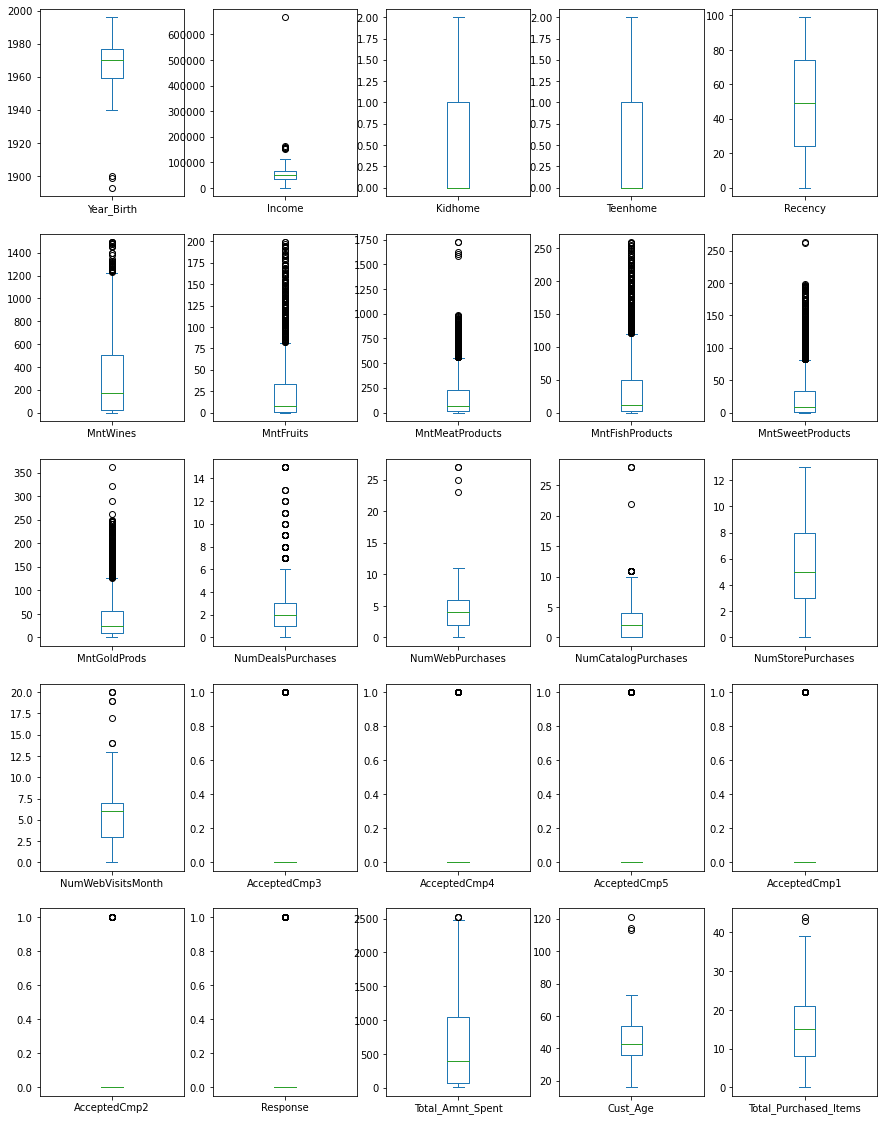

In [28]:
# check outliers
df_plot = df_.select_dtypes(include=['int64', 'float64'])
df_plot.plot(kind='box', subplots=True, layout=(5,5), figsize=(15,20))

In [29]:
# check min max value
for dtype, col in list(zip(df_.dtypes, df_.columns)):
    if dtype == 'float64' or dtype == 'int64':
        print(col, df_[col].min(), df_[col].max())
        print()

Year_Birth 1893 1996

Income 1730.0 666666.0

Kidhome 0 2

Teenhome 0 2

Recency 0 99

MntWines 0 1493

MntFruits 0 199

MntMeatProducts 0 1725

MntFishProducts 0 259

MntSweetProducts 0 263

MntGoldProds 0 362

NumDealsPurchases 0 15

NumWebPurchases 0 27

NumCatalogPurchases 0 28

NumStorePurchases 0 13

NumWebVisitsMonth 0 20

AcceptedCmp3 0 1

AcceptedCmp4 0 1

AcceptedCmp5 0 1

AcceptedCmp1 0 1

AcceptedCmp2 0 1

Response 0 1

Total_Amnt_Spent 5 2525

Cust_Age 16 121

Total_Purchased_Items 0 44



In [30]:
# Gonna remove people with year_birth < 1900
df_ = df_[ df_['Year_Birth'] > 1900 ]

In [31]:
print(df_.Year_Birth.min(), df_.Cust_Age.max())

1940 73


Year_Birth                  AxesSubplot(0.125,0.749828;0.133621x0.130172)
Income                   AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Kidhome                   AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Teenhome                 AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Recency                  AxesSubplot(0.766379,0.749828;0.133621x0.130172)
MntWines                    AxesSubplot(0.125,0.593621;0.133621x0.130172)
MntFruits                AxesSubplot(0.285345,0.593621;0.133621x0.130172)
MntMeatProducts           AxesSubplot(0.44569,0.593621;0.133621x0.130172)
MntFishProducts          AxesSubplot(0.606034,0.593621;0.133621x0.130172)
MntSweetProducts         AxesSubplot(0.766379,0.593621;0.133621x0.130172)
MntGoldProds                AxesSubplot(0.125,0.437414;0.133621x0.130172)
NumDealsPurchases        AxesSubplot(0.285345,0.437414;0.133621x0.130172)
NumWebPurchases           AxesSubplot(0.44569,0.437414;0.133621x0.130172)
NumCatalogPurchases      AxesSubplot(0

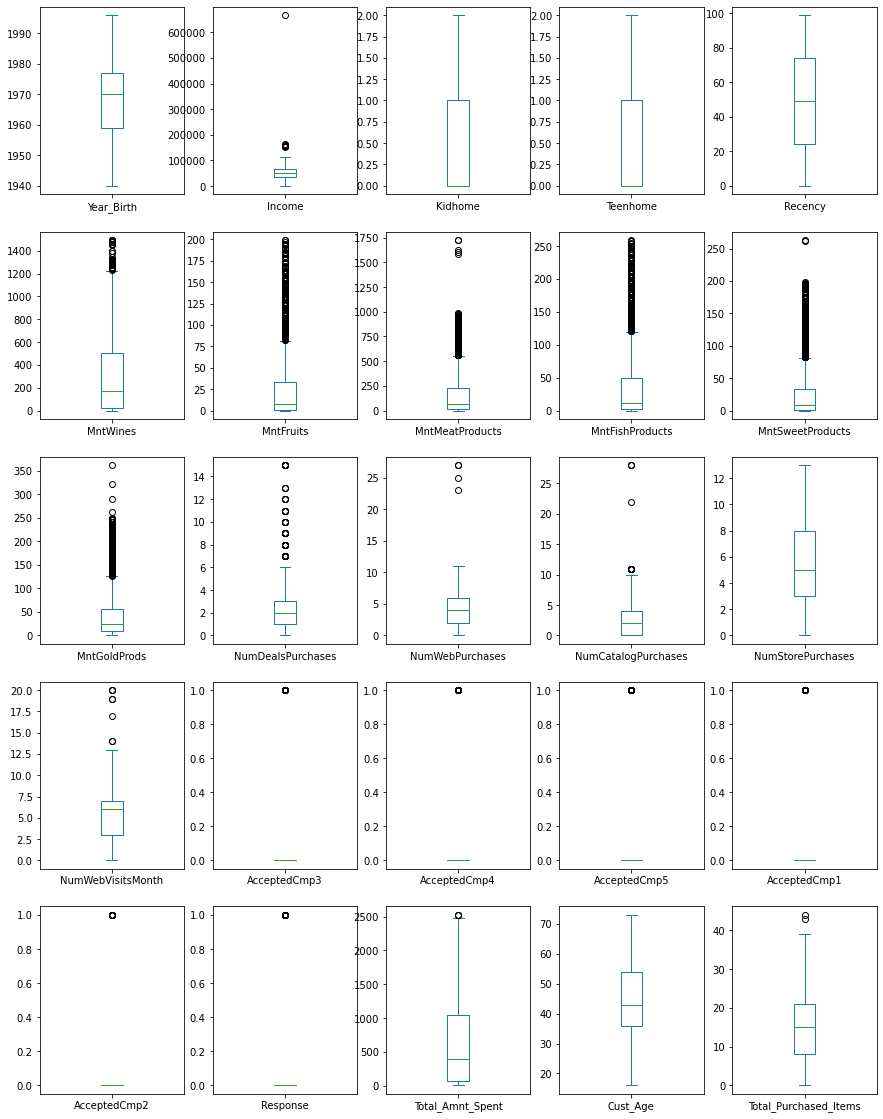

In [32]:
df_plot = df_.select_dtypes(include=['int64', 'float64'])
df_plot.plot(kind='box', subplots=True, layout=(5,5), figsize=(15,20))

## Data Preprocessing II (After Split)

In [33]:
def check_nan(df):
    list = []
    for i in df:
        isnan = True if (df[i].isna().sum() > 0) else False
        if isnan:
            list.append(i)
    return list

In [34]:
train_isnan = check_nan(df_train)
valid_isnan = check_nan(df_valid)
test_isnan = check_nan(df_test)
print(train_isnan, valid_isnan, test_isnan)

['Income'] ['Income'] ['Income']


In [35]:
# Mean: When your dataset is in a normal distribution, you can use mean to fill in the missing values.
# Median: When your dataset is not in a normal distribution, you can use the median value to fill in the missing values.
# Median is also preferred when the distribution is skewed, as it is less sensitive to outliers than the mean.
# Mode: When the missing values in your data are categorical and discrete, you can use the mode value to fill in the missing values.

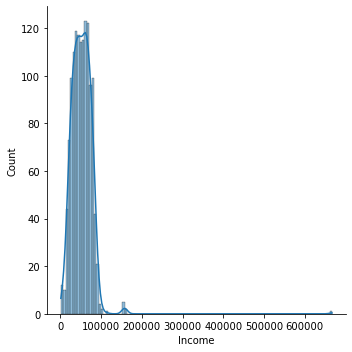

In [36]:
# Check the distribution of data
sns.displot(data=df_train, x='Income', kde=True)

In [37]:
# Gonna use median, because it's preferrable for skewed distribution and outliers.
df_train['Income'] = df_train['Income'].fillna(value=df_train.Income.median())
df_valid['Income'] = df_valid['Income'].fillna(value=df_valid.Income.median())
df_test['Income'] = df_test['Income'].fillna(value=df_test.Income.median())

Year_Birth                AxesSubplot(0.125,0.749828;0.133621x0.130172)
Income                 AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Kidhome                 AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Teenhome               AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Recency                AxesSubplot(0.766379,0.749828;0.133621x0.130172)
MntWines                  AxesSubplot(0.125,0.593621;0.133621x0.130172)
MntFruits              AxesSubplot(0.285345,0.593621;0.133621x0.130172)
MntMeatProducts         AxesSubplot(0.44569,0.593621;0.133621x0.130172)
MntFishProducts        AxesSubplot(0.606034,0.593621;0.133621x0.130172)
MntSweetProducts       AxesSubplot(0.766379,0.593621;0.133621x0.130172)
MntGoldProds              AxesSubplot(0.125,0.437414;0.133621x0.130172)
NumDealsPurchases      AxesSubplot(0.285345,0.437414;0.133621x0.130172)
NumWebPurchases         AxesSubplot(0.44569,0.437414;0.133621x0.130172)
NumCatalogPurchases    AxesSubplot(0.606034,0.437414;0.133621x0.

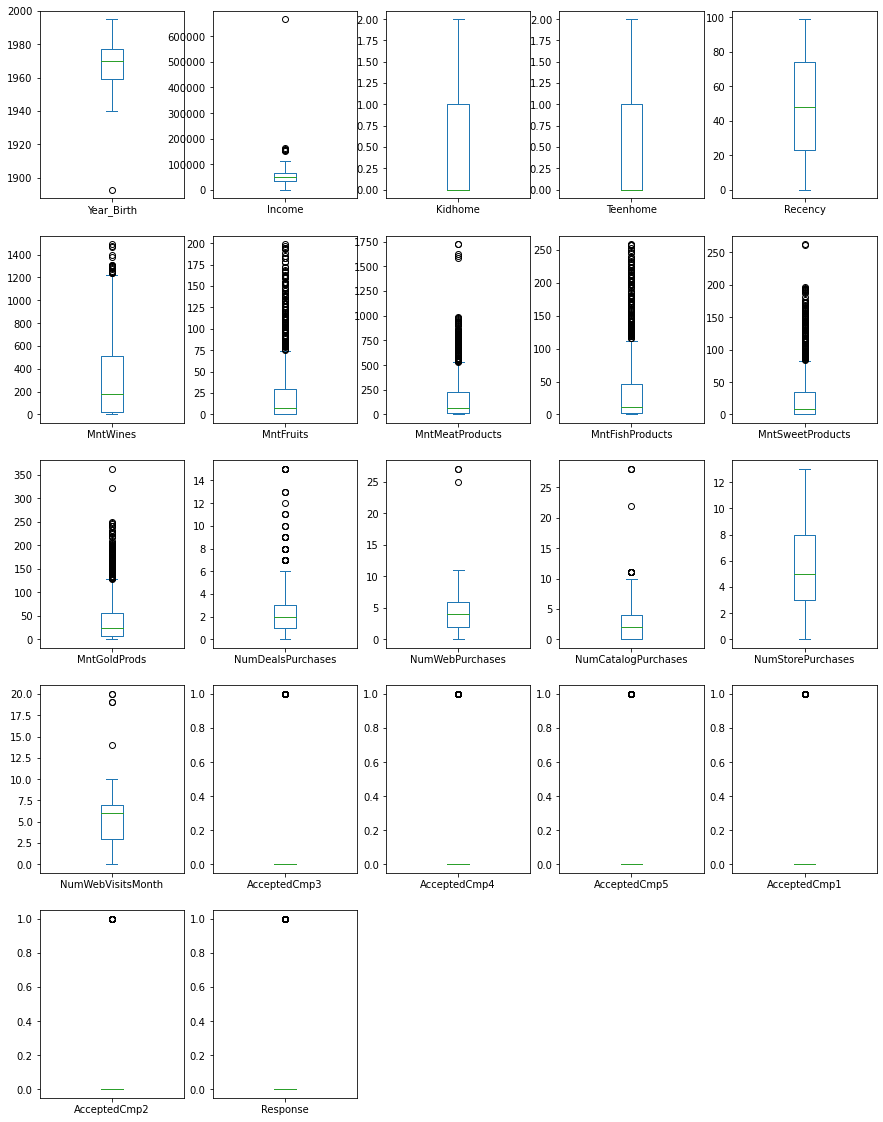

In [38]:
# Check outliers
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
df_plot_train = df_train.select_dtypes(include=['float64','int64'])
df_plot_train.plot(kind='box', subplots=True, layout=(5,5), figsize=(15,20))                                            

In [39]:
print(df_train.Year_Birth.min(), df_train.Year_Birth.max())

1893 1995


In [40]:
# Remove rows with birth year < 1900
df_train = df_train[ (df_train['Year_Birth'] > 1900) ]

Year_Birth                AxesSubplot(0.125,0.749828;0.133621x0.130172)
Income                 AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Kidhome                 AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Teenhome               AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Recency                AxesSubplot(0.766379,0.749828;0.133621x0.130172)
MntWines                  AxesSubplot(0.125,0.593621;0.133621x0.130172)
MntFruits              AxesSubplot(0.285345,0.593621;0.133621x0.130172)
MntMeatProducts         AxesSubplot(0.44569,0.593621;0.133621x0.130172)
MntFishProducts        AxesSubplot(0.606034,0.593621;0.133621x0.130172)
MntSweetProducts       AxesSubplot(0.766379,0.593621;0.133621x0.130172)
MntGoldProds              AxesSubplot(0.125,0.437414;0.133621x0.130172)
NumDealsPurchases      AxesSubplot(0.285345,0.437414;0.133621x0.130172)
NumWebPurchases         AxesSubplot(0.44569,0.437414;0.133621x0.130172)
NumCatalogPurchases    AxesSubplot(0.606034,0.437414;0.133621x0.

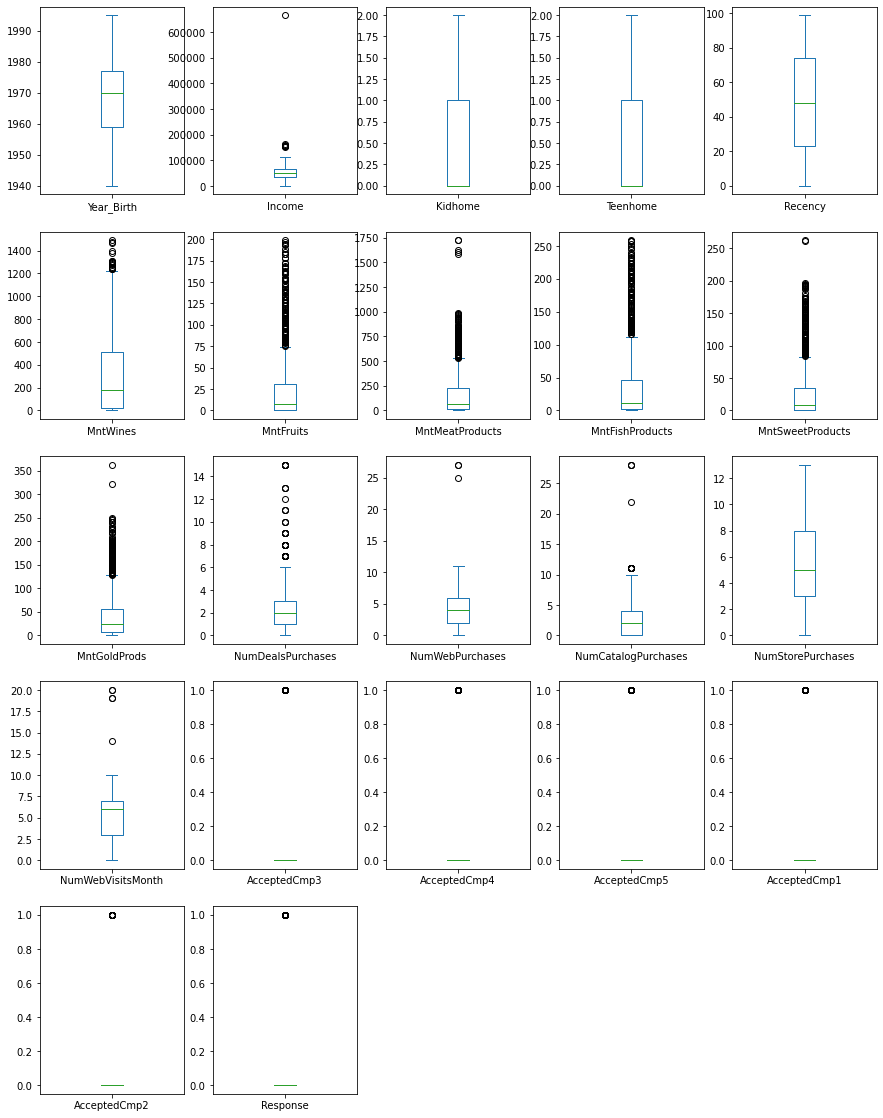

In [41]:
df_plot_train = df_train.select_dtypes(include=['float64','int64'])
df_plot_train.plot(kind='box', subplots=True, layout=(5,5), figsize=(15,20))   

In [42]:
df_valid = df_valid[(df_valid.Year_Birth > 1900)]
df_test = df_test[(df_test.Year_Birth > 1900)]

#### Categorical Preprocessing

In [43]:
df_train.head(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
1935,1975,2n Cycle,Together,34984.0,1,1,2012-09-06,40,8,4,...,1,0,3,7,0,0,0,0,0,0
1395,1956,Master,Married,63915.0,0,2,2013-07-30,2,622,7,...,6,3,12,5,0,0,0,0,0,0
1359,1971,Master,Single,33316.0,1,1,2013-10-04,34,79,1,...,2,1,4,6,0,0,0,0,0,0
74,1952,Graduation,Married,28332.0,0,0,2014-04-30,58,14,10,...,2,1,4,2,0,0,0,0,0,0
531,1969,Graduation,Single,72679.0,0,1,2013-09-18,65,619,54,...,4,7,5,1,0,0,0,0,0,0


In [44]:
print(df.Marital_Status.unique())
print(df.Education.unique())

['Single' 'Together' 'Married' 'Divorced' 'Widow']
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


In [45]:
# ordinal (tingkatan)
cols_education = {
    'Basic':1,
    '2n Cycle':2,
    'Graduation':3,
    'Master':4,
    'PhD':5
}

In [46]:
df_train_encode = df_train[:][:].copy()
df_test_encode = df_test[:][:].copy()
df_valid_encode = df_valid[:][:].copy()

In [47]:
df_train_encode['Education'] = df_train_encode['Education'].map(cols_education)
df_test_encode['Education'] = df_test_encode['Education'].map(cols_education)
df_valid_encode['Education'] = df_valid_encode['Education'].map(cols_education)

In [48]:
df_train_encode.head(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
1935,1975,2,Together,34984.0,1,1,2012-09-06,40,8,4,...,1,0,3,7,0,0,0,0,0,0
1395,1956,4,Married,63915.0,0,2,2013-07-30,2,622,7,...,6,3,12,5,0,0,0,0,0,0
1359,1971,4,Single,33316.0,1,1,2013-10-04,34,79,1,...,2,1,4,6,0,0,0,0,0,0
74,1952,3,Married,28332.0,0,0,2014-04-30,58,14,10,...,2,1,4,2,0,0,0,0,0,0
531,1969,3,Single,72679.0,0,1,2013-09-18,65,619,54,...,4,7,5,1,0,0,0,0,0,0


In [49]:
df_train_encode = df_train_encode.assign(Dt_Customer_Year=df_train_encode.Dt_Customer.dt.year, Dt_Customer_Month=df_train_encode.Dt_Customer.dt.month, 
                       Dt_Customer_Date=df_train_encode.Dt_Customer.dt.day)
df_test_encode = df_test_encode.assign(Dt_Customer_Year=df_test_encode.Dt_Customer.dt.year, Dt_Customer_Month=df_test_encode.Dt_Customer.dt.month, 
                       Dt_Customer_Date=df_test_encode.Dt_Customer.dt.day)
df_valid_encode = df_valid_encode.assign(Dt_Customer_Year=df_valid_encode.Dt_Customer.dt.year, Dt_Customer_Month=df_valid_encode.Dt_Customer.dt.month, 
                       Dt_Customer_Date=df_valid_encode.Dt_Customer.dt.day)

In [50]:
df_train_encode = df_train_encode.drop(columns=['Dt_Customer'], axis=1, inplace=False)
df_test_encode = df_test_encode.drop(columns=['Dt_Customer'], axis=1, inplace=False)
df_valid_encode = df_valid_encode.drop(columns=['Dt_Customer'], axis=1, inplace=False)

In [51]:
df_train_encode.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Dt_Customer_Year,Dt_Customer_Month,Dt_Customer_Date
1935,1975,2,Together,34984.0,1,1,40,8,4,15,...,7,0,0,0,0,0,0,2012,9,6
1395,1956,4,Married,63915.0,0,2,2,622,7,115,...,5,0,0,0,0,0,0,2013,7,30
1359,1971,4,Single,33316.0,1,1,34,79,1,31,...,6,0,0,0,0,0,0,2013,10,4
74,1952,3,Married,28332.0,0,0,58,14,10,13,...,2,0,0,0,0,0,0,2014,4,30
531,1969,3,Single,72679.0,0,1,65,619,54,260,...,1,0,0,0,0,0,0,2013,9,18


In [52]:
# nominal 
from sklearn.feature_extraction import DictVectorizer

In [53]:
v = DictVectorizer(sparse=False)

In [54]:
df_train_list_dicts = df_train_encode.to_dict(orient='records') # Transforms lists of feature-value
df_test_list_dicts = df_test_encode.to_dict(orient='records') # Transforms lists of feature-value
df_valid_list_dicts = df_valid_encode.to_dict(orient='records') # Transforms lists of feature-value

In [55]:
df_train_list_dicts[:1]

[{'Year_Birth': 1975,
  'Education': 2,
  'Marital_Status': 'Together',
  'Income': 34984.0,
  'Kidhome': 1,
  'Teenhome': 1,
  'Recency': 40,
  'MntWines': 8,
  'MntFruits': 4,
  'MntMeatProducts': 15,
  'MntFishProducts': 3,
  'MntSweetProducts': 5,
  'MntGoldProds': 3,
  'NumDealsPurchases': 2,
  'NumWebPurchases': 1,
  'NumCatalogPurchases': 0,
  'NumStorePurchases': 3,
  'NumWebVisitsMonth': 7,
  'AcceptedCmp3': 0,
  'AcceptedCmp4': 0,
  'AcceptedCmp5': 0,
  'AcceptedCmp1': 0,
  'AcceptedCmp2': 0,
  'Response': 0,
  'Dt_Customer_Year': 2012,
  'Dt_Customer_Month': 9,
  'Dt_Customer_Date': 6}]

In [56]:
df_train_ = v.fit_transform(df_train_list_dicts)
df_train_

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.000e+00,
        1.975e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 2.000e+00,
        1.956e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.000e+00,
        1.971e+03],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 2.000e+00,
        1.960e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.000e+00,
        1.971e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.000e+00,
        1.968e+03]])

In [57]:
df_test_ = v.transform(df_test_list_dicts)
df_valid_ = v.transform(df_valid_list_dicts)

In [58]:
df_train_temp = pd.DataFrame(data=df_train_, columns=v.get_feature_names())
df_test_temp = pd.DataFrame(data=df_test_, columns=v.get_feature_names())
df_valid_temp = pd.DataFrame(data=df_valid_, columns=v.get_feature_names())

In [59]:
display(df_train_encode[:5])
print(df_train_encode.shape)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Dt_Customer_Year,Dt_Customer_Month,Dt_Customer_Date
1935,1975,2,Together,34984.0,1,1,40,8,4,15,...,7,0,0,0,0,0,0,2012,9,6
1395,1956,4,Married,63915.0,0,2,2,622,7,115,...,5,0,0,0,0,0,0,2013,7,30
1359,1971,4,Single,33316.0,1,1,34,79,1,31,...,6,0,0,0,0,0,0,2013,10,4
74,1952,3,Married,28332.0,0,0,58,14,10,13,...,2,0,0,0,0,0,0,2014,4,30
531,1969,3,Single,72679.0,0,1,65,619,54,260,...,1,0,0,0,0,0,0,2013,9,18


(1343, 27)


In [60]:
df_train_temp[:5]

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Dt_Customer_Date,Dt_Customer_Month,Dt_Customer_Year,Education,Income,...,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Response,Teenhome,Year_Birth
0,0.0,0.0,0.0,0.0,0.0,6.0,9.0,2012.0,2.0,34984.0,...,8.0,0.0,2.0,3.0,1.0,7.0,40.0,0.0,1.0,1975.0
1,0.0,0.0,0.0,0.0,0.0,30.0,7.0,2013.0,4.0,63915.0,...,622.0,3.0,2.0,12.0,6.0,5.0,2.0,0.0,2.0,1956.0
2,0.0,0.0,0.0,0.0,0.0,4.0,10.0,2013.0,4.0,33316.0,...,79.0,1.0,3.0,4.0,2.0,6.0,34.0,0.0,1.0,1971.0
3,0.0,0.0,0.0,0.0,0.0,30.0,4.0,2014.0,3.0,28332.0,...,14.0,1.0,1.0,4.0,2.0,2.0,58.0,0.0,0.0,1952.0
4,0.0,0.0,0.0,0.0,0.0,18.0,9.0,2013.0,3.0,72679.0,...,619.0,7.0,1.0,5.0,4.0,1.0,65.0,0.0,1.0,1969.0


In [61]:
display(df_train_temp[:5][ [c for c in df_train_temp.columns if 'Marital_Status' in str(c)] ])
print(df_train_temp.shape)

,Marital_Status=Divorced,Marital_Status=Married,Marital_Status=Single,Marital_Status=Together,Marital_Status=Widow
0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0


(1343, 31)


## Data Insight I

In [62]:
from matplotlib import pyplot as plt

In [63]:
# Pearson corr: For the Pearson correlation, an absolute value of 1 indicates a perfect linear relationship between the variables.
# The larger the absolute value of the coefficient, the stronger the relationship between the variables

In [64]:
df_.head(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Total_Amnt_Spent,Cust_Age,Total_Purchased_Items
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,7,0,0,0,0,0,1,1617,55,25
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,5,0,0,0,0,0,0,27,60,6
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,776,48,21
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,6,0,0,0,0,0,0,53,30,8
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,422,33,19


### Correlation Age with Response

<AxesSubplot:xlabel='Cust_Age', ylabel='Count'>

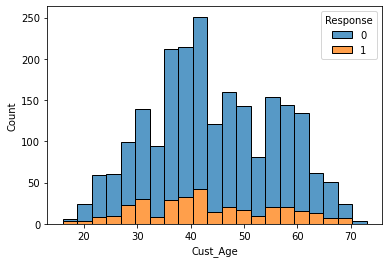

In [65]:
sns.histplot(data=df_, x='Cust_Age', hue='Response', multiple='stack')
# customer di rentang usia pertengahan 30 - 50 menerima penawaran campaign lebih banyak

In [66]:
df__corr = df_.corr(method='pearson')[['Cust_Age','Response']]
df__corr.loc[['Cust_Age', 'Response'], :]
# korelasi antara umur terhadap variable 'yang menerima penawaran campaign' hampir atau bisa dikatakan tidak ada karena korelasi -0.02 mendekati 0

,Cust_Age,Response
Cust_Age,1.000000,-0.028333
Response,-0.028333,1.000000


In [67]:
import scipy.stats as st

In [68]:
np_resp = df_['Response'].to_numpy()
np_age = df_['Cust_Age'].to_numpy()
st.pointbiserialr(np_resp, np_age)

PointbiserialrResult(correlation=-0.028332854129393095, pvalue=0.18038288712265607)

### Correlation Education with Response

In [69]:
cats = 0 
for i in df_['Education'].unique():
    cats=cats+1
cats

5

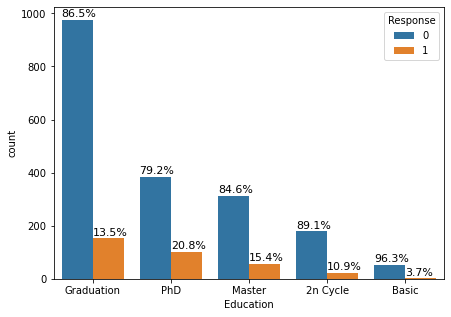

In [70]:
orders = ['Graduation', 'PhD', 'Master', '2n Cycle', 'Basic']
fig, ax = plt.subplots(figsize=(7,5)) # Create just a figure and only one subplot

ax = sns.countplot(ax=ax, data=df_, x='Education', hue='Response', order=orders)
n_hues = 2 #hue: response(0, 1)
_bars = [p for p in ax.patches] 
h_bars = [p.get_height() for p in ax.patches]
for i in range(cats):
    total_values = df_['Education'].value_counts().sort_values(ascending=False).values[i]
    for j in range(n_hues):
        percent = '{:.1f}%'.format(100 * h_bars[(j*cats + i)]/total_values)
        x = _bars[(j*cats + i)].get_x() + _bars[(j*cats + i)].get_width() / 2 - 0.2
        y = _bars[(j*cats + i)].get_y() + _bars[(j*cats + i)].get_height() + 10.5
        ax.annotate(percent, (x, y), size = 11)
fig.show()

# Mayoritas data customer pada Ifood merupakan lulusan 'Graduation'
# Mereka yang menerima penawaran campaign Ifood, mayoritas lulusan 'Graduation'

In [71]:
df_['Education'].value_counts().sort_values(ascending=False)

Graduation    1127
PhD            485
Master         370
2n Cycle       201
Basic           54
Name: Education, dtype: int64

In [72]:
# notes
p_ = [p.get_height() for p in ax.patches]
p_
# first 5: resp 0, last 5: resp 1 [index]
# 0, 1, 2, 3, 4 -> cats
# 0, 1, 2, 3, 4 -> 0-pair-height
# 5, 6, 7, 8, 9 -> 1-pair_height

[975, 384, 313, 179, 52, 152, 101, 57, 22, 2]

### Correlation Marital Status with Response

<AxesSubplot:xlabel='Marital_Status', ylabel='Count'>

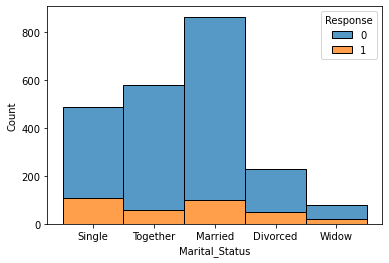

In [73]:
sns.histplot(data=df_, x='Marital_Status', hue='Response', multiple='stack')

### Correlation Recency with Response

<AxesSubplot:xlabel='Recency', ylabel='Count'>

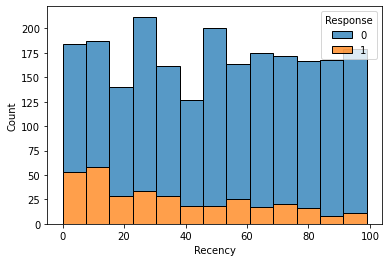

In [74]:
sns.histplot(data=df_, x='Recency', hue='Response', multiple='stack')
#next: siapa mereka yang melakukan pembelian dengan last purchased 40 hari terakhir 

In [75]:
np_recency = df_['Recency'].to_numpy()
st.pointbiserialr(np_resp, np_recency)

PointbiserialrResult(correlation=-0.19856777504710288, pvalue=2.5196420514366122e-21)

### Correlation Join Date with Response

<AxesSubplot:xlabel='Dt_Customer', ylabel='Count'>

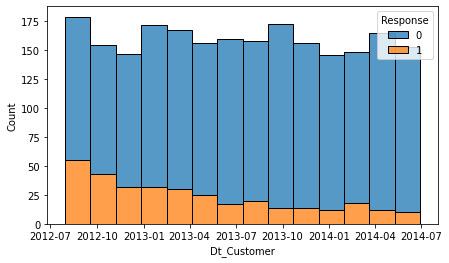

In [76]:
#sns.set(rc={'figure.figsize':(7,4)})
fig, ax = plt.subplots(figsize=(7,4)) # Create just a figure and only one subplot

sns.histplot(ax=ax, data=df_, x='Dt_Customer', hue='Response', multiple='stack')
# 2 tahun terakhir (2012 -2014) yang bergabung dan menerima penawaran campaign mengalami penurunan

In [77]:
print(df_.Dt_Customer.min())
print(df_.Dt_Customer.max())

2012-07-30 00:00:00
2014-06-29 00:00:00


### Correlation Income with Response

<AxesSubplot:xlabel='Income'>

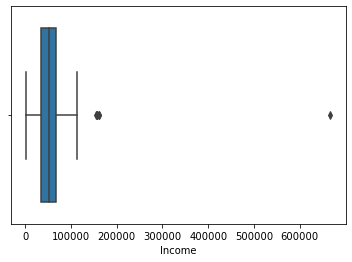

In [78]:
sns.boxplot(data=df_, x='Income')
# Customer yang banyak menerima penawaran merupakan customer yang memiliki income tahunan berada pada kisaran 40k+ 

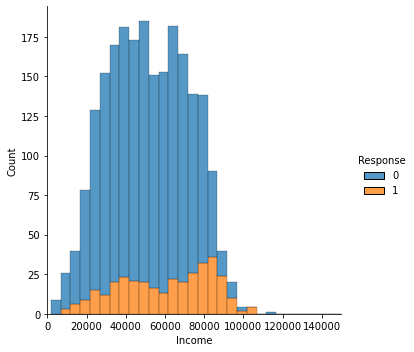

In [79]:
fg = sns.displot(data=df_, x='Income', hue='Response', multiple='stack')
fg.set(xlim=(0,150000))

In [80]:
np_income = df_.Income.to_numpy()
st.pointbiserialr(np_resp, np_income)

PointbiserialrResult(correlation=0.13312076067681594, pvalue=2.6015364127441355e-10)

### Correlation Total Children with Response

In [81]:
cols = ['Kidhome', 'Teenhome']
total_child = df_.loc[:][cols].sum(axis=1)

In [82]:
df_['Total_Child'] = total_child

In [83]:
df_.head(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Total_Amnt_Spent,Cust_Age,Total_Purchased_Items,Total_Child
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,0,1,1617,55,25,0
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,0,27,60,6,2
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,0,776,48,21,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,0,53,30,8,1
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,0,422,33,19,1


<AxesSubplot:xlabel='Total_Child', ylabel='Count'>

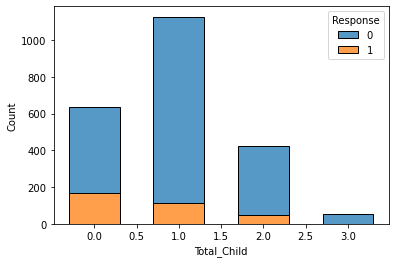

In [84]:
sns.histplot(data=df_, x='Total_Child', hue='Response', multiple='stack', discrete=True, shrink=.6)
# hypothesis: Buyers yang memiliki sedikit anak cenderung lebih banyak menerima penawaran campaign

In [85]:
np_tot_child = df_['Total_Child'].to_numpy()
st.pointbiserialr(np_resp, np_tot_child)

PointbiserialrResult(correlation=-0.16945616189508145, pvalue=7.105284641383969e-16)

### Correlation Total Amount Spent with Response

<AxesSubplot:xlabel='Count', ylabel='Total_Amnt_Spent'>

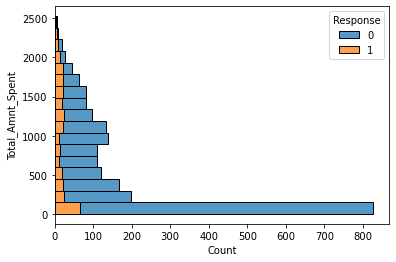

In [86]:
sns.histplot(data=df_, y='Total_Amnt_Spent', hue='Response', multiple='stack')
# total product yang dibeli customers paling banyak sekitaran 1000-2000 product 

In [87]:
np_tot_amnt = df_['Total_Amnt_Spent'].to_numpy()
st.pointbiserialr(np_resp, np_tot_amnt)

PointbiserialrResult(correlation=0.26572563785642345, pvalue=1.8259979410186725e-37)

### Correlation NumWebVisitsMonth with Response

In [88]:
np_web_visits = df_['NumWebVisitsMonth'].to_numpy()
st.pointbiserialr(np_resp, np_web_visits)
# Banyak jumlah web dikunjungi tidak ada korelasi dengan response

PointbiserialrResult(correlation=-0.004449481523440198, pvalue=0.8334099256233367)

In [89]:
#....

## Data Insight II

In [90]:
from matplotlib.patches import ConnectionPatch

In [91]:
tot_item_wdisc = df_.NumDealsPurchases.sum()
tot_item_wcatalog = df_.NumCatalogPurchases.sum()
tot_item_wdirstore = df_.NumStorePurchases.sum()
tot_item_wweb = df_.NumWebPurchases.sum()
sum_tot_items = df_.Total_Purchased_Items.sum()

print(tot_item_wdisc, tot_item_wcatalog, tot_item_wdirstore, tot_item_wweb)
print(sum_tot_items)

5205 5956 12962 9143
33266


### Who's the buyers

In [92]:
df_buyers = df_[:][:].copy()

#### Average Ages Across Different Education Levels

In [93]:
df_buyers_grad_1 = df_buyers.loc[(df_buyers['Education'] == 'Graduation') & (df_buyers['Response'] == 1)]
df_buyers_phd_1 = df_buyers.loc[(df_buyers['Education'] == 'PhD') & (df_buyers['Response'] == 1)]
df_buyers_master_1 = df_buyers.loc[(df_buyers['Education'] == 'Master') & (df_buyers['Response'] == 1)]
df_buyers_basic_1 = df_buyers.loc[(df_buyers['Education'] == 'Basic') & (df_buyers['Response'] == 1)]
df_buyers_2n_1 = df_buyers.loc[(df_buyers['Education'] == '2n Cycle') & (df_buyers['Response'] == 1)]

print(df_buyers_grad_1.Cust_Age.mean(), df_buyers_phd_1.Cust_Age.mean(), 
      df_buyers_master_1.Cust_Age.mean(), df_buyers_basic_1.Cust_Age.mean(),
     df_buyers_2n_1.Cust_Age.mean())

42.60526315789474 45.0 43.96491228070175 39.5 39.40909090909091


<AxesSubplot:xlabel='Education', ylabel='Cust_Age'>

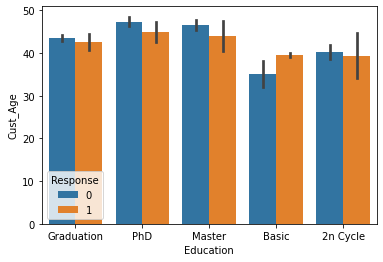

In [94]:
sns.barplot(data=df_buyers, x='Education', y='Cust_Age', hue='Response')
# rata usia customer ketika bergabung dalam penawaran campaign(1) pada setiap lulusan

In [95]:
print(df_buyers.Cust_Age.min(), df_buyers.Cust_Age.max())

16 73


In [96]:
tot_data = df_buyers.shape[0]
tot_data_1 = df_buyers[:][df_buyers.Response == 1].shape[0]

_age = ['Under 20', '21-35', '36-50', 'Over 50']
bar_data_age_grad = [
    df_buyers.loc[(df_buyers['Cust_Age'] < 21) & (df_buyers['Education'] == 'Graduation') & (df_buyers['Response']==1)].Cust_Age.count(),
    df_buyers.loc[(df_buyers['Cust_Age'] > 20) & (df_buyers['Cust_Age'] < 36) & (df_buyers['Education'] == 'Graduation') & (df_buyers['Response']==1)].Cust_Age.count(),
    df_buyers.loc[(df_buyers['Cust_Age'] > 35) & (df_buyers['Cust_Age'] < 51) & (df_buyers['Education'] == 'Graduation') & (df_buyers['Response']==1)].Cust_Age.count(),
    df_buyers.loc[(df_buyers['Cust_Age'] > 50) & (df_buyers['Education'] == 'Graduation') & (df_buyers['Response']==1)].Cust_Age.count()
]
bar_data_age_grad

[3, 43, 63, 43]

In [97]:
_edu = []
for u in df_buyers.Education.unique():
    _edu.append(u)
# >>> ['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle']

df_buyers_edu = df_buyers[df_buyers['Response']==1].Education.value_counts()
data_edu = [
    df_buyers_edu['Graduation'],
    df_buyers_edu['PhD'],
    df_buyers_edu['Master'],
    df_buyers_edu['Basic'],
    df_buyers_edu['2n Cycle'],
]
data_edu

[152, 101, 57, 2, 22]

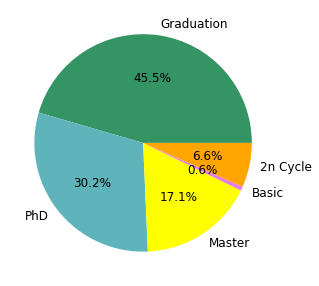

In [98]:
edu_chart_percentage = [float(x) for x in ([
    '{:.1f}'.format((data_edu[0]/tot_data_1)*100),
    '{:.1f}'.format((data_edu[1]/tot_data_1)*100),
    '{:.1f}'.format((data_edu[2]/tot_data_1)*100),
    '{:.1f}'.format((data_edu[3]/tot_data_1)*100),
    '{:.1f}'.format((data_edu[4]/tot_data_1)*100),
])]

fig, ax = plt.subplots(figsize=(7,5))
ax.pie(edu_chart_percentage, autopct='%1.1f%%', labels=_edu, colors=['#349464','#5FB3BB','yellow','#E77BE5','orange'], textprops={'size':12}) 
fig.show()

In [99]:
age_chart_percentage_grad = [float(x) for x in([
    '{:.1f}'.format((bar_data_age_grad[0]/tot_data_1)*100),
    '{:.1f}'.format((bar_data_age_grad[1]/tot_data_1)*100),
    '{:.1f}'.format((bar_data_age_grad[2]/tot_data_1)*100),
    '{:.1f}'.format((bar_data_age_grad[3]/tot_data_1)*100),
])]
age_chart_percentage_grad

[0.9, 12.9, 18.9, 12.9]

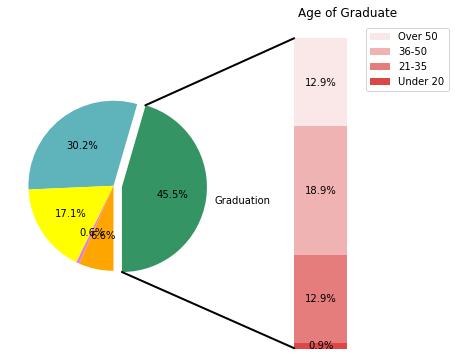

In [100]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,6))
fig.subplots_adjust(wspace=0.1)

wedges, *_  = ax1.pie(edu_chart_percentage, autopct='%1.1f%%', labels=['Graduation', '', '', '', ''], explode=[.1,0,0,0,0], startangle=270,
        colors=['#349464','#5FB3BB','yellow','#E77BE5','orange'], textprops={'size':10}) 

w = .2
b = 1
for j, (h, label) in enumerate(reversed([*zip(age_chart_percentage_grad,_age)])):
    b -= h
    barContainer = ax2.bar(0, height=h, width=w, bottom=b, color='C3', label=label, alpha=0.1+0.25 * j)
    ax2.bar_label(barContainer, labels=[f'{h}%'], label_type='center')

ax2.set_title('Age of Graduate')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(-1.5*w, 2.5*w)

theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_chart_percentage_grad)

# draw top connecting line
x = r * np.cos(np.pi / 323 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-w / 2, 1), coordsA=ax2.transData,
                      xyB=(-x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(2)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 20 * theta1) + center[0]
y = r * np.sin(np.pi / 20 * theta1) + center[1]
con = ConnectionPatch(xyA=(-w / 2, -44.5), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(2)

fig.show()

In [101]:
select_cols = ['Cust_Age', 'Education', 'Income', 'Response']
df_buyers_ = df_buyers[:][select_cols]

In [102]:
df_buyers_1 = df_buyers_[df_buyers_['Response']==1]

In [103]:
df_buyers_1.head(5)

,Cust_Age,Education,Income,Response
0,55,Graduation,58138.0,1
8,39,PhD,30351.0,1
15,66,PhD,82800.0,1
33,60,PhD,46610.0,1
39,70,PhD,48948.0,1


In [104]:
df_under_20_grad = df_buyers_1.loc[(df_buyers_1.Cust_Age < 21) & (df_buyers_1.Education=='Graduation')]
df_21_35_grad = df_buyers_1.loc[(df_buyers_1.Cust_Age > 20 ) & (df_buyers_1.Cust_Age < 36) & (df_buyers_1.Education=='Graduation')]
df_36_50_grad = df_buyers_1.loc[(df_buyers_1.Cust_Age > 35 ) & (df_buyers_1.Cust_Age < 51) & (df_buyers_1.Education=='Graduation')]
df_over_50_grad = df_buyers_1.loc[(df_buyers_1.Cust_Age > 50 ) & (df_buyers_1.Education=='Graduation')]

In [105]:
mean_items = {
    'Income(mean)':(df_under_20_grad.Income.mean(), df_21_35_grad.Income.mean(), df_36_50_grad.Income.mean(), df_over_50_grad.Income.mean()),
    'Age':_age
}

dx = pd.DataFrame(mean_items)
dx

,Income(mean),Age
0,81762.666667,Under 20
1,54269.651163,21-35
2,58603.190476,36-50
3,69512.232558,Over 50


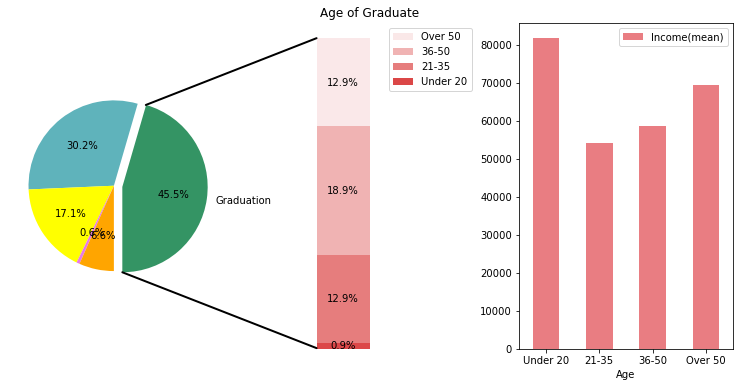

In [106]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(13,6))
fig.subplots_adjust(wspace=0.2)

wedges, *_  = ax1.pie(edu_chart_percentage, autopct='%1.1f%%', labels=['Graduation', '', '', '', ''], explode=[.1,0,0,0,0], startangle=270,
        colors=['#349464','#5FB3BB','yellow','#E77BE5','orange'], textprops={'size':10}) 

w = .2
b = 1
for j, (h, label) in enumerate(reversed([*zip(age_chart_percentage_grad,_age)])):
    b -= h
    barContainer = ax2.bar(0, height=h, width=w, bottom=b, color='C3', label=label, alpha=0.1+0.25 * j)
    ax2.bar_label(barContainer, labels=[f'{h}%'], label_type='center')

ax2.set_title('Age of Graduate')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(-1.5*w, 2.5*w)

dx.plot.bar(ax=ax3, x='Age', y='Income(mean)', rot=0, color='#E97D82')

theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_chart_percentage_grad)

# draw top connecting line
x = r * np.cos(np.pi / 323 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-w / 2, 1), coordsA=ax2.transData,
                      xyB=(-x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(2)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 20 * theta1) + center[0]
y = r * np.sin(np.pi / 20 * theta1) + center[1]
con = ConnectionPatch(xyA=(-w / 2, -44.5), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(2)

fig.show()

#### Average Income 

<AxesSubplot:xlabel='Education', ylabel='Income'>

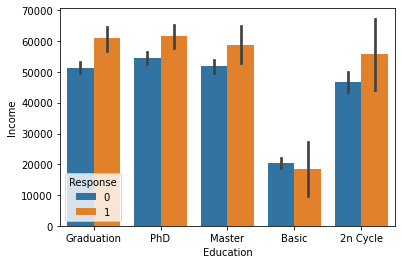

In [107]:
sns.barplot(data=df_buyers, x='Education', y='Income', hue='Response')
# rata income customer pertahun yang menerima penawaran campaign

### Purchases Made

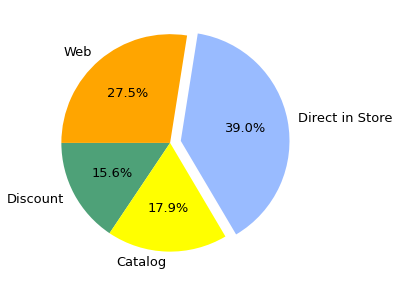

In [108]:
fig, ax1 = plt.subplots(figsize=(8,5))

chart_percentage = [float(x) for x in ([
    '{:.1f}'.format((tot_item_wdisc/sum_tot_items)*100),
    '{:.1f}'.format((tot_item_wcatalog/sum_tot_items)*100),
    '{:.1f}'.format((tot_item_wdirstore/sum_tot_items)*100),
    '{:.1f}'.format((tot_item_wweb/sum_tot_items)*100)
])]

labels = ['Discount', 'Catalog', 'Direct in Store', 'Web']
explode = [0, 0, 0.1, 0]
angle = 60 * chart_percentage[2]
wedges, *_ = ax1.pie(chart_percentage, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode, colors=['#4EA178','yellow','#99bbff','orange'], textprops={'size': 13})

fig.show()


In [109]:
df_purch_dis = df_[df_.NumDealsPurchases != 0]
df_purch_cat = df_[df_.NumCatalogPurchases != 0]
df_purch_web = df_[df_.NumWebPurchases != 0]
df_purch_store = df_[df_.NumStorePurchases != 0]

In [110]:
mean_purch_age = [df_purch_dis.Cust_Age.mean(), df_purch_cat.Cust_Age.mean(), df_purch_web.Cust_Age.mean(), df_purch_store.Cust_Age.mean()]
line_age = {
    'Label':['Discount','Catalog','Website','Direct In Store'],
    'Age(mean)':mean_purch_age,
}
pd.DataFrame(line_age)

,Label,Age(mean)
0,Discount,44.090370
1,Catalog,45.350484
2,Website,44.168647
3,Direct In Store,44.127363


### Previous Campaign

In [111]:
df_buyers.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Total_Amnt_Spent', 'Cust_Age',
       'Total_Purchased_Items', 'Total_Child'],
      dtype='object')

In [112]:
prev_campaign = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']
df_buyers[:][prev_campaign].tail(5) # 1: accept; 0: otherwise

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2
2235,0,0,0,0,0
2236,0,0,0,1,0
2237,0,1,0,0,0
2238,0,0,0,0,0
2239,0,0,0,0,0


In [113]:
np_camp_1 = df_buyers['AcceptedCmp1'].to_numpy()
np_camp_2 = df_buyers['AcceptedCmp2'].to_numpy()
np_camp_3 = df_buyers['AcceptedCmp3'].to_numpy()
np_camp_4 = df_buyers['AcceptedCmp4'].to_numpy()
np_camp_5 = df_buyers['AcceptedCmp5'].to_numpy()

pt_camp_1 = st.pointbiserialr(np_resp, np_camp_1)
pt_camp_2 = st.pointbiserialr(np_resp, np_camp_2)
pt_camp_3 = st.pointbiserialr(np_resp, np_camp_3)
pt_camp_4 = st.pointbiserialr(np_resp, np_camp_4)
pt_camp_5 = st.pointbiserialr(np_resp, np_camp_5)

data = {
    'Campaign': ['Campaign 1','Campaign 2','Campaign 3','Campaign 4','Campaign 5'],
    'Corr':[pt_camp_1[0], pt_camp_2[0], pt_camp_3[0], pt_camp_4[0], pt_camp_5[0]],
    'PVal':[pt_camp_1[1], pt_camp_2[1], pt_camp_3[1], pt_camp_4[1], pt_camp_5[1] ]
}
pd.DataFrame(data).sort_values(by='Corr', ascending=False)

,Campaign,Corr,PVal
4,Campaign 5,0.328182,2.532524e-57
0,Campaign 1,0.293882,8.309339e-46
2,Campaign 3,0.254144,2.597240e-34
3,Campaign 4,0.176890,3.510116e-17
1,Campaign 2,0.169249,7.712782e-16


## Modelling

#### Logistic Regression
Logistic Regression is a supervised classification model.

In [114]:
y_train = df_train_temp.Response
y_test = df_test_temp.Response
y_valid = df_valid_temp.Response

In [115]:
x_train = df_train_temp.loc[:, ~(df_train_temp.columns.isin(['Response'])) ]
x_test = df_test_temp.loc[:, ~(df_test_temp.columns.isin(['Response'])) ]
x_valid = df_valid_temp.loc[:, ~(df_valid_temp.columns.isin(['Response'])) ]

In [116]:
# The response is a classification model
from sklearn.linear_model import LogisticRegression

In [117]:
# Metrics accuracy 
from sklearn.metrics import roc_auc_score

In [118]:
l = LogisticRegression(random_state=42)

In [119]:
l.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [120]:
y_valid_pred = l.predict_proba(x_valid)

In [121]:
y_valid_pred[:1]
# 0.81/1.00 is the probability of the first data would be recognized by 0
# 0.16/1.00 is the probability of the first data would be recognized by 1

array([[0.83179781, 0.16820219]])

In [122]:
# mterics to check how well the classifier distinguishes the + class from - class
roc_auc_score(y_valid, y_valid_pred[:,1])

0.7683118386243386

#### Random Forest

In [147]:
from sklearn.ensemble import RandomForestClassifier

In [148]:
rf = RandomForestClassifier(random_state=42)

In [149]:
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [153]:
y_rf_valid_pred = rf.predict_proba(x_valid)

In [154]:
y_rf_valid_pred[:1]

array([[0.71, 0.29]])

In [155]:
roc_auc_score(y_valid, y_rf_valid_pred[:,1])

0.9009383267195766

## Model Stability Check

#### Logistic Regression

In [123]:
x_train_ = pd.concat([x_train, x_valid])
y_train_ = pd.concat([y_train, y_valid])

In [124]:
lr = LogisticRegression(random_state=42)

In [125]:
lr.fit(x_train_, y_train_)

LogisticRegression(random_state=42)

In [126]:
y_test_pred = lr.predict_proba(x_test)
y_test_pred[:2]

array([[0.69369106, 0.30630894],
       [0.85045789, 0.14954211]])

In [127]:
roc_auc_score(y_test, y_test_pred[:,1])

0.758245382585752

#### Random Forest

In [156]:
rfs = RandomForestClassifier(random_state=42)

In [157]:
rfs.fit(x_train_, y_train_)

RandomForestClassifier(random_state=42)

In [159]:
y_rfs_test_pred = rfs.predict_proba(x_test)
y_rfs_test_pred[:1]

array([[0.86, 0.14]])

In [160]:
roc_auc_score(y_test, y_rfs_test_pred[:,1])

0.8844482383982617

## Interpretation

In [128]:
import shap

In [161]:
explainer_rf = shap.TreeExplainer(rfs)

In [162]:
shap_vals_rf = explainer_rf.shap_values(x_test)

In [171]:
shap_vals_rf[:1]

[array([[ 0.01234002,  0.00157432,  0.01172675, ...,  0.00392338,
          0.01287419,  0.00567249],
        [ 0.01855696,  0.00142552,  0.01229929, ...,  0.02130945,
          0.01679506,  0.00306663],
        [ 0.00541089,  0.00174814, -0.17434604, ...,  0.06870477,
         -0.00752918,  0.00020836],
        ...,
        [ 0.00775262,  0.00158727,  0.01652044, ..., -0.11060176,
          0.00659365, -0.002635  ],
        [ 0.00899484,  0.0018511 ,  0.01319028, ...,  0.00819311,
          0.00447965, -0.00397607],
        [ 0.0071455 ,  0.0012538 ,  0.01219336, ...,  0.02832334,
          0.00433085,  0.00283182]])]

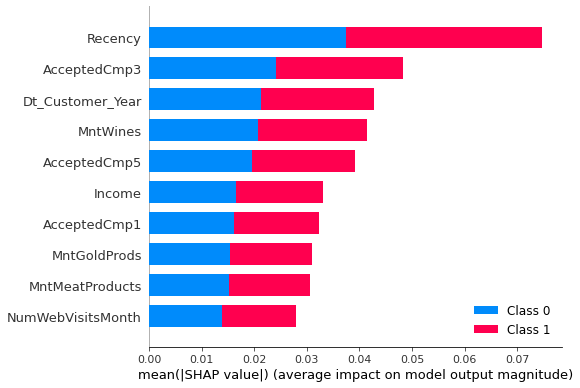

In [163]:
shap.summary_plot(shap_vals_rf, features=x_test, max_display=10)

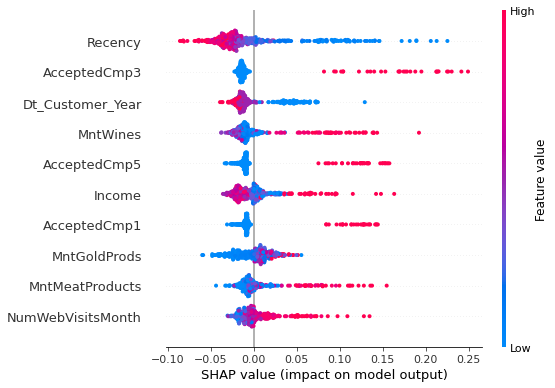

In [174]:
shap.summary_plot(shap_vals_rf[1], features=x_test, max_display=10)

**Summary**

Based on the interpretation of shap above, 10 top features have been selected which have an impact on model, <br>
where the model itself will be a benchmark in subsequent campaign optimization. <br>
Result that gives + impact on campaign will be accepted as following:<br>
- Customer with lower recency.
- Customer that accept the campaign 3, 5, and 1 has tendency to accept the latest campaign.
- Customer with high income.
- Customer with high interest with wines, gold, and meat products of campaign.
- Total visit of company's web has impact on campaign.

#### Interpretation using Linear Model.
note: this interpretation wont be used as final summary.

In [133]:
masker = shap.maskers.Independent(data=x_train_)

In [134]:
explainer = shap.explainers.Linear(lr, masker=masker)

In [136]:
# explain the model pred
shap_vals = explainer.shap_values(x_test)

array([[-1.66526867e-05, -1.05364953e-06, -8.74586446e-06, ...,
         2.80244339e-01, -1.96358914e-04,  2.66328098e-03],
       [-1.66526867e-05, -1.05364953e-06, -8.74586446e-06, ...,
        -4.26458777e-01, -1.96358914e-04, -2.62800574e-03],
       [-1.66526867e-05, -1.05364953e-06,  4.28547359e-04, ...,
        -1.40122170e+00,  2.04373564e-04,  2.03009034e-02],
       ...,
       [-1.66526867e-05, -1.05364953e-06, -8.74586446e-06, ...,
         7.67625798e-01, -1.96358914e-04, -3.26119638e-02],
       [-1.66526867e-05, -1.05364953e-06, -8.74586446e-06, ...,
         3.04613412e-01, -1.96358914e-04, -3.43757261e-02],
       [-1.66526867e-05, -1.05364953e-06, -8.74586446e-06, ...,
        -1.32811448e+00, -1.96358914e-04, -4.39176798e-03]])

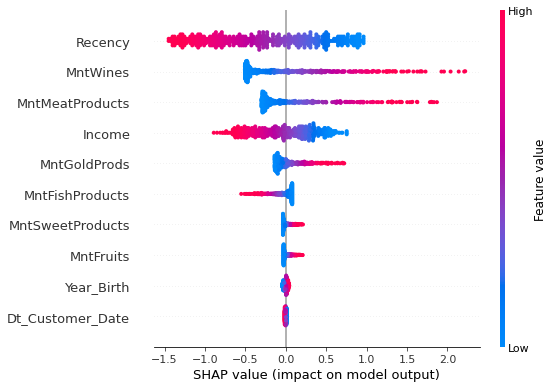

In [145]:
# https://shap-lrjball.readthedocs.io/en/latest/generated/shap.summary_plot.html
# plotting the shap result
shap.summary_plot(shap_vals, features=x_test, max_display=10)